In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime
import lightgbm as lgb
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import cufflinks as cf
%reload_ext autoreload
%autoreload 2
cf.set_config_file(world_readable=True,theme='pearl')
from IPython.core.interactiveshell import InteractiveShell  
InteractiveShell.ast_node_interactivity = "all"

e:\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [10]:
df = pd.read_csv('../data/ceping.csv',encoding='gb18030')
df_z = df[['Z学习动力','Z学习能力','Z学习毅力']]
df_t = df[['T学习动力','T学习能力','T学习毅力']]

In [11]:
df_z.sample(10)
df_t.sample(10)

,Z学习动力,Z学习能力,Z学习毅力
711,0.453404,0.142198,0.780292
180,0.858648,0.136805,0.804198
18,0.979160,0.163354,0.661080
708,0.233265,-0.364507,-0.268617
958,1.188984,0.449729,1.124279
277,-0.867894,-0.599204,0.299495
229,0.869076,-0.406441,1.190147
657,-0.804614,0.047954,-0.221535
1067,0.391509,0.125140,-0.206873
160,-0.957889,0.168138,-0.600677


,T学习动力,T学习能力,T学习毅力
9,59.531064,52.563088,56.610803
46,46.161518,45.280646,35.743404
534,64.427440,55.856302,57.332101
609,60.748740,57.529478,51.198324
520,48.236210,52.043508,50.468022
682,49.318394,61.411804,67.821192
641,46.883248,49.282195,48.451722
300,43.696810,42.194779,47.621448
140,42.969020,45.774294,50.515003
668,66.046359,59.251674,64.667002


Text(0.5, 0, '聚类集群数')

Text(0, 0.5, '分数')

Text(0.5, 1.0, 'Elbow 曲线')

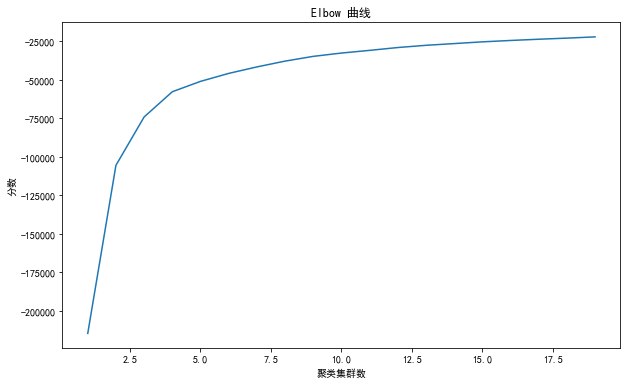

In [12]:
data = df_t
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('聚类集群数')
plt.ylabel('分数')
plt.title('Elbow 曲线')
plt.show()

Text(0.5, 0, '聚类集群数')

Text(0, 0.5, '分数')

Text(0.5, 1.0, 'Elbow 曲线')

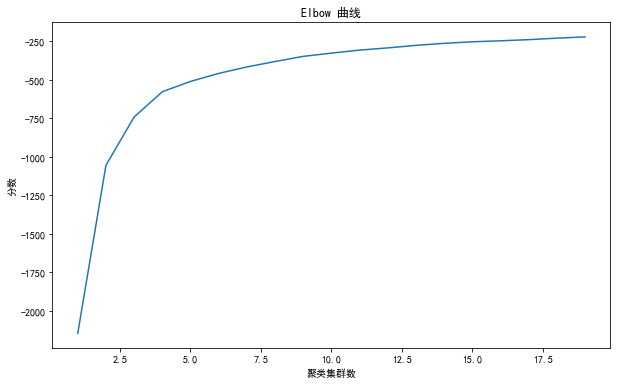

In [13]:
data = df_z
n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(data) for i in n_cluster]
scores = [kmeans[i].score(data) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('聚类集群数')
plt.ylabel('分数')
plt.title('Elbow 曲线')
plt.show()

In [14]:
X = df_z
X = X.reset_index(drop=True)
km = KMeans(n_clusters=4)
km.fit(X)
km.predict(X)
labels = km.labels_

df_z['categories']=labels
df_z['categories']=df_z.categories.apply(lambda x: 'category'+str(x+1))

df_z.iplot(kind='scatter3d',
           x='Z学习动力',y='Z学习能力',z='Z学习毅力',
           size=5,
           categories='categories',
           xTitle='学习动力',
           yTitle='学习能力',
           zTitle='学习毅力',
           title='Z分数均值聚类',
           opacity=1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([1, 3, 1, ..., 0, 0, 0])

e:\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [16]:
X = df_t
X = X.reset_index(drop=True)
km = KMeans(n_clusters=4)
km.fit(X)
km.predict(X)
labels = km.labels_
df_t['categories']=labels
df_t['categories']=df_t.categories.apply(lambda x: 'category'+str(x+1))

df_t.iplot(kind='scatter3d',
           x='T学习动力',y='T学习能力',z='T学习毅力',
           size=5,
           categories='categories',
           xTitle='学习动力',
           yTitle='学习能力',
           zTitle='学习毅力',
           title='T分数均值聚类',
           opacity=1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

array([3, 0, 3, ..., 1, 1, 1])

e:\Anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning:

Consider using IPython.display.IFrame instead

